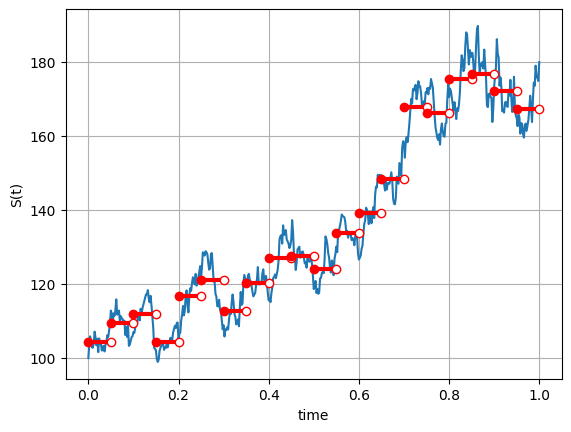

In [1]:
# Random step functions  and integration

import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d 
import scipy.integrate as integrate 


def generatePathsGBMABM(NoOfPaths, NoOfSteps, T, r, sigma, S_0):
    Z=np.random.normal(0.0, 1.0, [NoOfPaths, NoOfSteps])
    X=np.zeros([NoOfPaths, NoOfSteps+1])
    time=np.zeros([NoOfSteps+1])

    X[:,0]=np.log(S_0) 

    dt=T/float(NoOfSteps)
    for i in range(0, NoOfSteps):

        if NoOfPaths>1:
            Z[:,i]=(z[:,i]-np.mean(Z[:,i]))/np.std(Z[:,i])
        X[:,i+1]=X[:,i]+(r-0.5*sigma*sigma)*dt+sigma*np.power(dt,0.5)*Z[:,i]
        time[i+1]=time[i]+dt 

    S=np.exp(X) 
    paths={'time':time,'S':S} 
    return paths 

def mainCalculation():
    NoOfPaths=1
    NoOfSteps=500
    T=1
    r=0.05
    sigma=0.4 
    S_0=100

    Paths=generatePathsGBMABM(NoOfPaths, NoOfSteps, T,r,sigma,S_0)
    timeGrid=Paths['time']
    S=Paths['S']

    plt.figure(1)
    plt.plot(timeGrid, np.transpose(S))
    plt.grid()
    plt.xlabel('time')
    plt.ylabel('S(t)')

    m=20 
    pathNumber=0
    f=interp1d(timeGrid, S[pathNumber, :])

    for k in range(1,m*T+1):
        tGrid=np.linspace(float((k-1))/m, float(k)/m, 100)
        g_m=m*integrate.trapz(np.squeeze(f(tGrid)), np.squeeze(tGrid))
        g_m=m*integrate.trapz(np.squeeze(f(tGrid)), np.squeeze(tGrid))
        plt.plot(tGrid,g_m*np.ones([len(tGrid),1]), '-r',linewidth=3.0)
        plt.plot(tGrid[0],g_m,'or')
        plt.plot(tGrid[-1],g_m,'or', markerfacecolor=[1,1,1])

mainCalculation()
